# Introduction to Regression with Neural Networks in Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


### Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

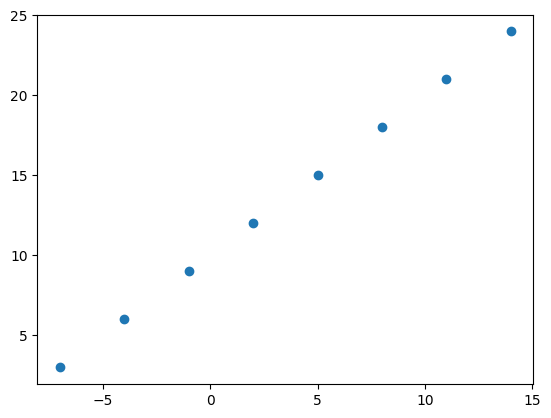

In [4]:
plt.scatter(X, y)

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shape

In [6]:
# Create a demo tensor for our jousing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garages"])
house_price = tf.constant([929700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([929700])>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
# Turn Numpy Array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

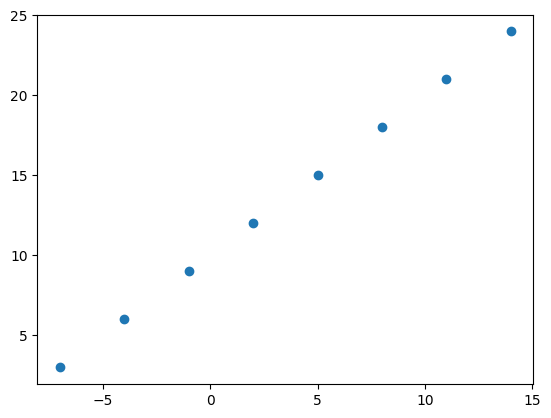

In [12]:
plt.scatter(X,y)

### Steps in modelling in Tensorflow

1. **Loss** - how wrong your model's prediction are compared to the truth labels (you want to minimize this).
2. **Optimizer** - how your model should update its internal patterns to better its predictions.
3. **Metric** - Human interpretable values for how well your model is doing

In [13]:
# Set random seed
# tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 448ms/step - loss: 18.6404 - mae: 18.6404
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 18.3592 - mae: 18.3592
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 18.0779 - mae: 18.0779
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 17.7967 - mae: 17.7967
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 17.5154 - mae: 17.5154


In [14]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 149ms/step


array([[-14.5737915]], dtype=float32)

In [15]:
y_pred + 13 ## calculating with loss function

array([[-1.5737915]], dtype=float32)

### Improving our model
1. **creating model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimizer function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - here we might fit a model for more epochs(leave it training for longer) or more data (give the model more examples to learn from).

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 663ms/step - loss: 13.2212 - mae: 13.2212
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6150 - mae: 12.6150
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0071 - mae: 12.0071
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3957 - mae: 11.3957
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7781 - mae: 10.7781
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1511 - mae: 10.1511
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5113 - mae: 9.5113
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8548 - mae: 8.8548
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1774 - mae: 8.1774
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4751 - mae: 7.4751
Epoch 11/100
1/1 [==============================] - 0s 7ms/step -

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 109ms/step


array([[25.686602]], dtype=float32)

### Evaluting the model

### Getting bigger data and starting from scratch

In [18]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [19]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

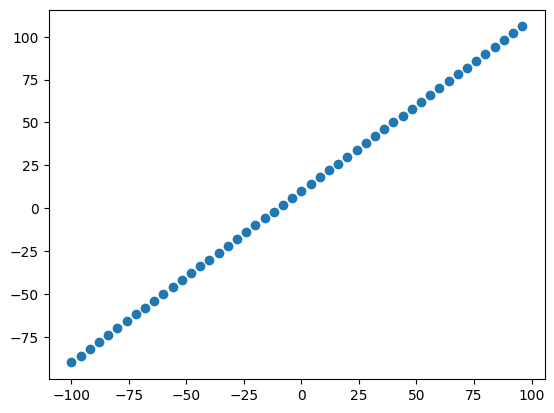

In [20]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [21]:
# check the len of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

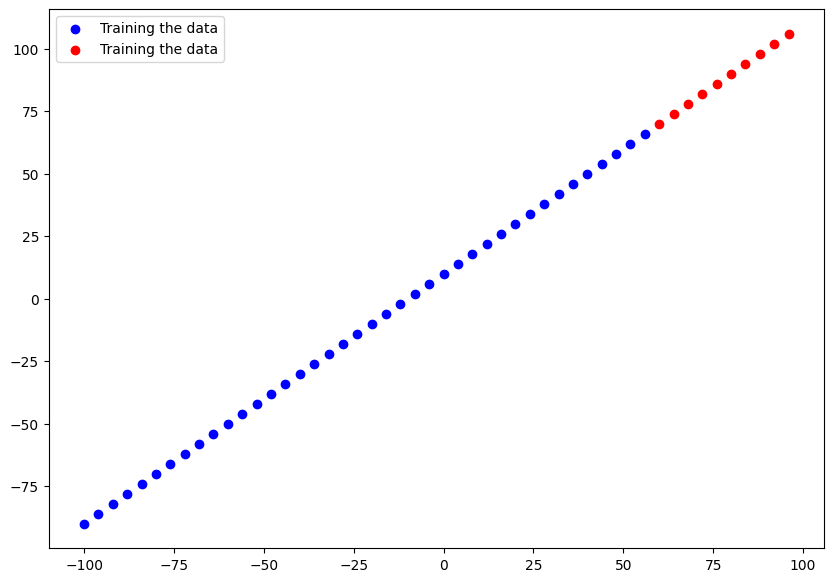

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label = "Training the data")
plt.scatter(X_test, y_test, c="r", label = "Training the data")
plt.legend()

In [24]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

### Visualize our model's prediction

In [27]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[ 90.88336 ],
       [ 96.820564],
       [102.75777 ],
       [108.694954],
       [114.63215 ],
       [120.56934 ],
       [126.50654 ],
       [132.44374 ],
       [138.38094 ],
       [144.31813 ]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [29]:
#Let's create a plotting function
def plot_prediction(train_date=X_train,
                   train_labels=y_train,
                   test_data=X_test,
                   test_labels=y_test,
                   predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_date, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="r", label = "Testing data")
    plt.scatter(test_data, predictions, c="y", label="prediction")
    plt.legend()

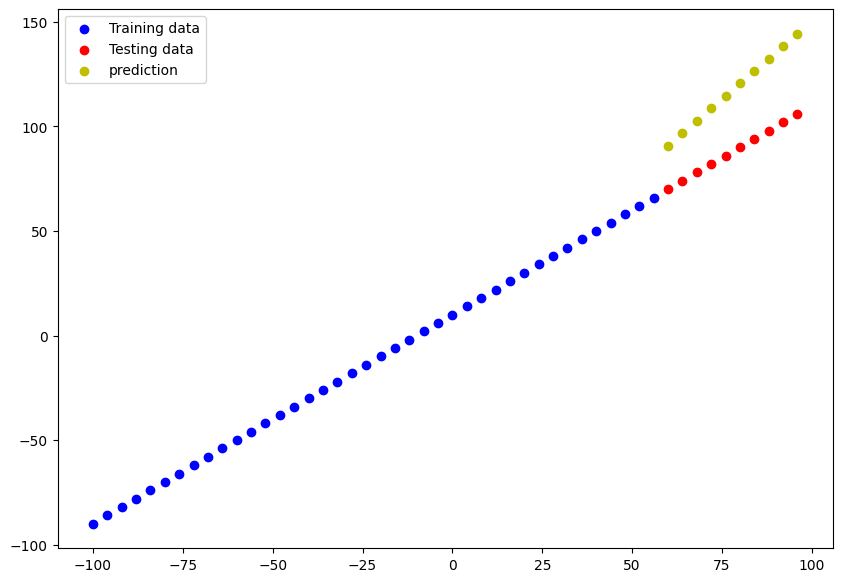

In [30]:
plot_prediction()

### Evaluating our model's predictions with regression evluation metricsm

In [31]:
# evaluate the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 128ms/step - loss: 29.6007 - mae: 29.6007


[29.600744247436523, 29.600744247436523]

In [32]:
y_pred

array([[ 90.88336 ],
       [ 96.820564],
       [102.75777 ],
       [108.694954],
       [114.63215 ],
       [120.56934 ],
       [126.50654 ],
       [132.44374 ],
       [138.38094 ],
       [144.31813 ]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [34]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.176672 , 11.9282255, 15.406214 , 20.694954 , 26.632147 ,
       32.569344 , 38.50654  , 44.44374  , 50.380936 , 56.318127 ],
      dtype=float32)>

### The mae is wrong it i giving us the a bit large value, the dimension in the `y_pred` and `y_test` tensors are different shape.

In [35]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 90.88336 ],
       [ 96.820564],
       [102.75777 ],
       [108.694954],
       [114.63215 ],
       [120.56934 ],
       [126.50654 ],
       [132.44374 ],
       [138.38094 ],
       [144.31813 ]], dtype=float32)>

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [37]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.88336 ,  96.820564, 102.75777 , 108.694954, 114.63215 ,
       120.56934 , 126.50654 , 132.44374 , 138.38094 , 144.31813 ],
      dtype=float32)>

In [38]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.600748>

In [39]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=907.16437>

In [40]:
# Mkae some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test,
                                          y_pred = tf.squeeze(y_pred))

def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true = y_test,
                                        y_pred = tf.squeeze(y_pred))

### Running experiments to improve the model

### Let's do 3 modelling expirements

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs.

In [41]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [42]:
# set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [43]:
# Make and plot prediction for model_1
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 45ms/step


array([[ 74.391205],
       [ 79.26529 ],
       [ 84.13937 ],
       [ 89.01345 ],
       [ 93.88753 ],
       [ 98.76161 ],
       [103.6357  ],
       [108.50977 ],
       [113.38385 ],
       [118.257935]], dtype=float32)

### The shape of y_pred_1 and X_test should be the same for ploting

In [44]:
y_pred_1.shape

(10, 1)

In [45]:
X_test.shape

TensorShape([10])

In [46]:
y_pred_reshape = y_pred_1.flatten()
y_pred_reshape.shape

(10,)

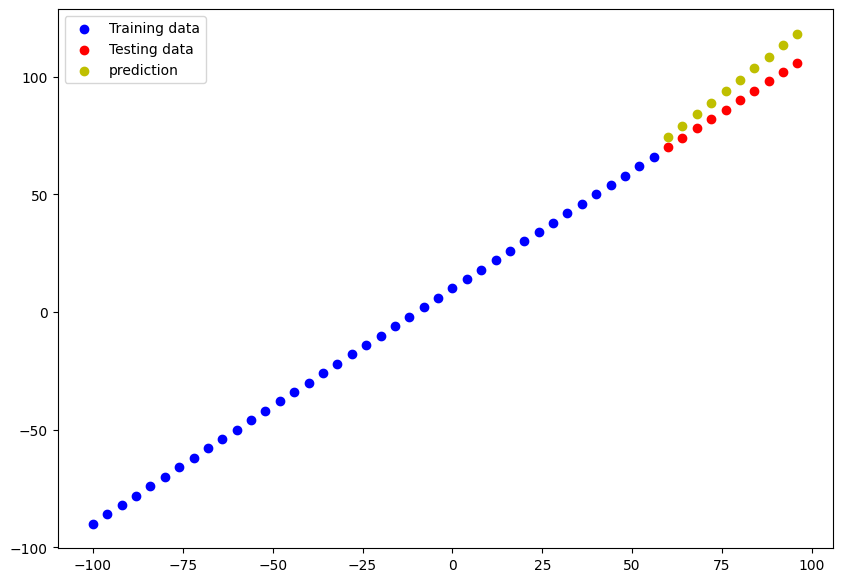

In [47]:
plot_prediction(predictions=y_pred_reshape)

In [48]:
# Calculate model_1 evaluation metics
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.324572>,
 <tf.Tensor: shape=(), dtype=float32, numpy=75.60162>)

### `model_2` increase the dense the layer

In [49]:
# Set the random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 49ms/step


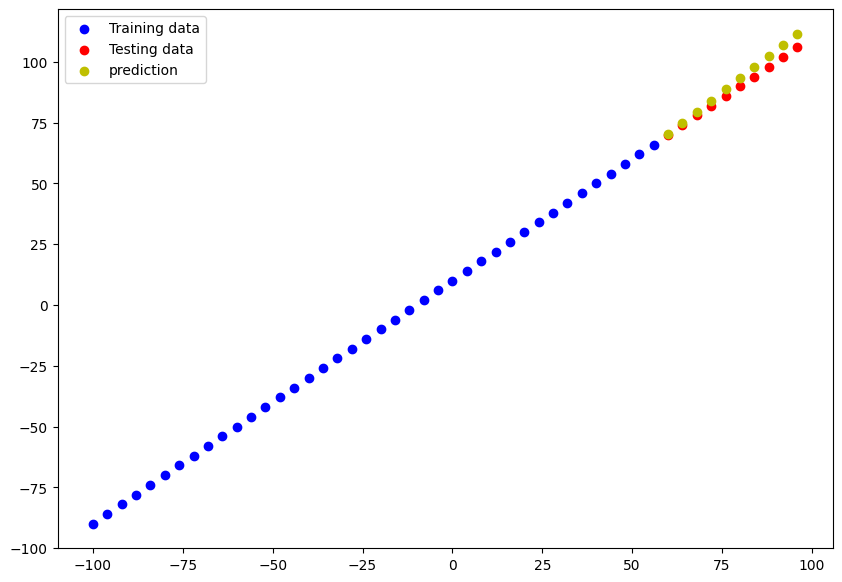

In [50]:
y_pred_2 = model_2.predict(X_test)
y_pred_2_reshape = y_pred_2.flatten()
plot_prediction(predictions = y_pred_2_reshape)

In [51]:
# calaulate the model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

In [52]:
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.986145>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.6739>)

### `model_3` - trained on more epochs

In [53]:
# Set the random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 56ms/step


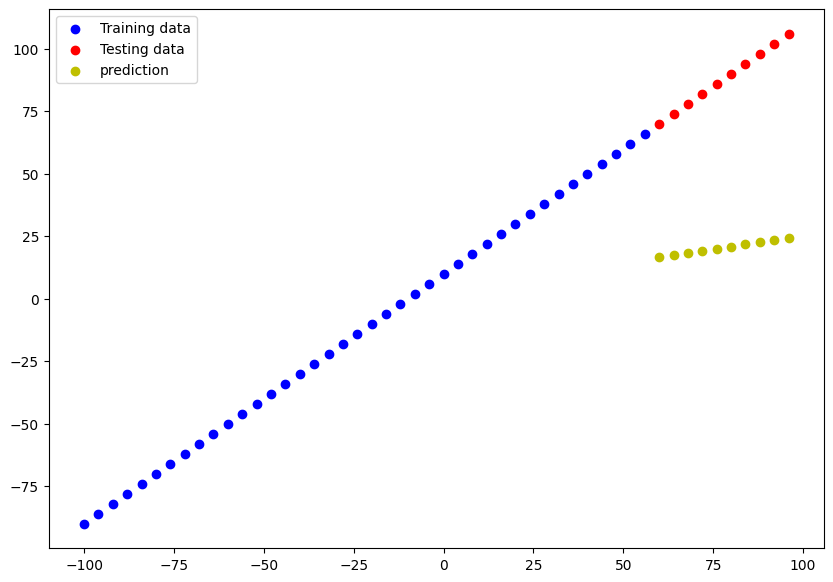

In [54]:
# Make and plot the prediction
y_pred_3 = model_3.predict(X_test)
y_pred_3_reshape = y_pred_3.flatten()
plot_prediction(predictions=y_pred_3_reshape)

In [55]:
# calaulate the model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

In [56]:
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.504234>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4640.613>)

### Comparing the results of our expeirments

we've run a few experiments, let's compare the results

In [57]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
            ["model_2", mae_2.numpy(), mse_2.numpy()],
            ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.324572,75.601624
1,model_2,2.986145,11.673900
2,model_3,67.504234,4640.612793
